# Домашнее задание 3

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 24 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_3

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Вновь рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n l (g(w, x_i), y_i).
\end{equation}

В прошлом задании работа шла с линейной модель $g(w, x) = w^T x$ и квадратичную функцию потерь $l(z, y) = (z-y)^2$. 

__(а)__ В дополнение к квадратичной функции потерь реализуйте логистическую/сигмоидную: $l(z,y) = \ln (1 + \exp(-yz))$ (__Важно: $y$ должен принимать значения $-1$ или $1$__). Выпишите градиент. Является ли новая задача регресии выпуклой? Оцените $L$ для новой функции потерь. 

1) Gradient
$$\nabla_w Loss(w) = \nabla_w \frac1n \sum\limits_{i=1}^n \ln(1 + \exp(-w^Tx_i y_i)) = \frac1n \sum\limits_{i=1}^n \frac{-x_i y_i\exp(-w^Tx_i y_i)}{1 + \exp(-w^Tx_i y_i)}$$

2) $L = \| \frac14 X_n^TX_n \|$ as the reference from https://web.eecs.umich.edu/~fessler/course/598/l/n-03-gd.pdf page 53 

3) Convexity: yes, the logistic regression is a convex optimization problem, because Logloss is a convex function



In [1]:
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import my_optimization as opt

__(б)__ Возьмите датасет _mushrooms_ из прошлого задания. Проделайте следующие шаги из прошлого задания, только с логистической функцией потерь:

1) Разделите данные на две части: обучающую и тестовую.

2) Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$ задачи обучения/оптимизации.

3) Используя градиентный спуск, обучите новую модель (без ограничений и регуляризаций). Постройте график: точность от номера итерации.

4) Если в пункте 3) пришлось столкнуться с проблемами или просто необходимо улучшить точность, то добавьте ограничения или $\ell_2$-регуляризацию, как в прошлом ДЗ.

5) Сравните с результатами квадратичной функции потерь из прошлого ДЗ.

In [2]:
#1
dataset = "mushrooms.txt" 
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
y = 2*y - 3
args = {}
args['n'], args['d'] = X.shape

args['X_train'], args['X_test'], args['y_train'], args['y_test'] = train_test_split(X, y, test_size=0.25, random_state=True)

#2
args['L'] = np.linalg.norm(1/(4*args['n']) * args['X_train'].T @ args['X_train'])
print(args['L'])

2.013288493062904


In [3]:
def logloss(w, args):
    ans = 0
    for i in range(len(args['X_train'])):
        ans += np.log(1 + np.exp(-(w @ args["X_train"][i]) * args["y_train"][i]))
    return ans / len(args["X_train"])
'''
def logloss_grad(w, args):
    n_samples = len(args['X_train']) 
    
    grad = np.zeros(w.size)

    for i in range(n_samples):
        grad -= np.real(args['y_train'][i] * args['X_train'][i] * np.exp(-w.dot(args['X_train'][i]) * args["y_train"][i]) / (1 + np.exp(- w.dot(args['X_train'][i]) * args['X_train'][i])))
    grad /= n_samples
            
    return grad
'''

def logloss_grad(w, args):
    grad = np.zeros(w.size)
    n_samples = args['X_train'].shape[0]
    for i in range(n_samples):
        grad += - args['X_train'][i] * args['y_train'][i] * np.exp(- w.dot(args['X_train'][i]) * args['y_train'][i]) / (1 + np.exp(- w.dot(args['X_train'][i]) * args['y_train'][i]))
    return grad / n_samples

def log_acc(k, f, grad_f, x_k, x_true, args):
    corr_count = 0
    test_count = len(args['y_test'])
    for i in range(test_count):
        if args['X_test'][i].dot(x_k) * args['y_test'][i] > 0:
            corr_count += 1
    return corr_count / test_count

In [13]:
#3  
n_iter = 20
x_0 = np.ones(args['d'])
args['c'] = 1

def gamma_k(k, f, grad_f, x_k, x_true, args):
        return args['c']/args['L']

gd = opt.GradientOptimizer(logloss, logloss_grad, x_0, criterium = '||grad_f(x_k)||', 
                           args = args, n_iter = n_iter, gamma_k = gamma_k, acc_k = log_acc)

points_arr, differences_arr, times_arr, acc_arr = gd.descent()

  0%|          | 0/20 [00:00<?, ?it/s]

1


<ipython-input-3-92f391083c78>:13: RuntimeWarning: overflow encountered in exp
  grad -= np.real(args['y_train'][i] * args['X_train'][i] * np.exp(-w.dot(args['X_train'][i]) * args["y_train"][i]) / (1 + np.exp(- w.dot(args['X_train'][i]) * args['X_train'][i])))
<ipython-input-3-92f391083c78>:13: RuntimeWarning: invalid value encountered in multiply
  grad -= np.real(args['y_train'][i] * args['X_train'][i] * np.exp(-w.dot(args['X_train'][i]) * args["y_train"][i]) / (1 + np.exp(- w.dot(args['X_train'][i]) * args['X_train'][i])))
<ipython-input-3-92f391083c78>:13: RuntimeWarning: invalid value encountered in true_divide
  grad -= np.real(args['y_train'][i] * args['X_train'][i] * np.exp(-w.dot(args['X_train'][i]) * args["y_train"][i]) / (1 + np.exp(- w.dot(args['X_train'][i]) * args['X_train'][i])))
  5%|▌         | 1/20 [00:00<00:16,  1.16it/s]

1


 10%|█         | 2/20 [00:01<00:15,  1.20it/s]

1


 15%|█▌        | 3/20 [00:02<00:12,  1.31it/s]

1


 25%|██▌       | 5/20 [00:03<00:09,  1.66it/s]

1


 30%|███       | 6/20 [00:03<00:07,  1.94it/s]

1
1


 40%|████      | 8/20 [00:04<00:05,  2.11it/s]

1


 45%|████▌     | 9/20 [00:04<00:04,  2.32it/s]

1


 50%|█████     | 10/20 [00:05<00:04,  2.42it/s]

1
1


 60%|██████    | 12/20 [00:05<00:03,  2.45it/s]

1
1


 65%|██████▌   | 13/20 [00:06<00:03,  1.96it/s]

1


 70%|███████   | 14/20 [00:07<00:03,  1.71it/s]

1


 75%|███████▌  | 15/20 [00:08<00:03,  1.57it/s]

1


 80%|████████  | 16/20 [00:08<00:02,  1.58it/s]

1


 90%|█████████ | 18/20 [00:09<00:01,  1.92it/s]

1
1


 95%|█████████▌| 19/20 [00:10<00:00,  1.95it/s]

1


100%|██████████| 20/20 [00:10<00:00,  1.90it/s]


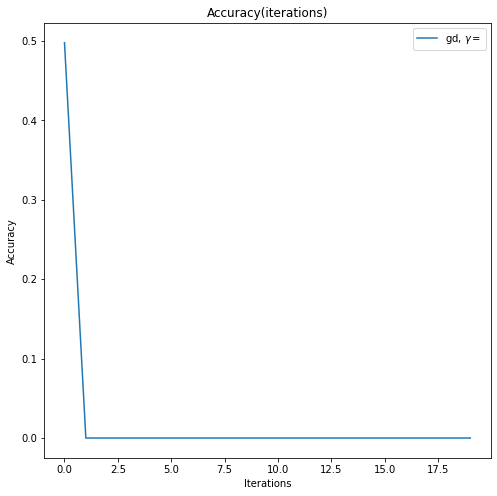

In [14]:
x, y, labels = [], [], []
x.append([i for i in range(n_iter)])
y.append(acc_arr)
labels.append('gd, $\gamma = \frac{%f}{4L}$' % args['c'])

title = 'Accuracy(iterations)'

opt.plot_graphs(x, y, x_label = "Iterations", lines_labels = labels, title = title, 
                logscale = False, criteria_type = "Accuracy")

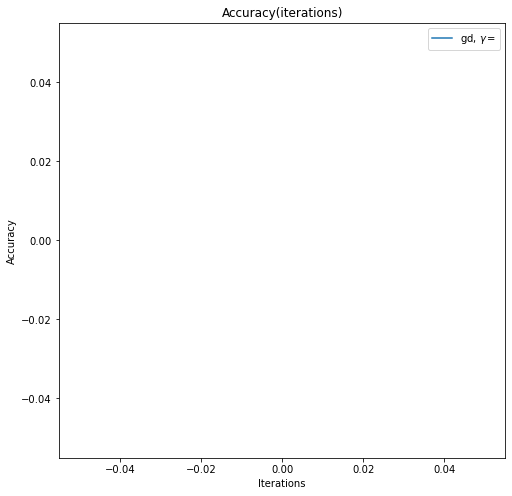

In [12]:
x, y, labels = [], [], []
x.append([i for i in range(n_iter)])
y.append(differences_arr)
labels.append('gd, $\gamma = \frac{%f}{4L}$' % (args['c']))

title = 'Accuracy(iterations)'

opt.plot_graphs(x, y, x_label = "Iterations", lines_labels = labels, title = title, 
                logscale = False, criteria_type = "Accuracy")

In [7]:
#4 
#regularization ??

In [8]:
#5
acc_hw_2 = 0.9960

## Задача 2

__(a)__ Реализуйте метод тяжелого шарика. 

In [9]:
n_iter = 10
x_0 = np.zeros(args['d'])
args['c'] = 1

def gamma_momentum(k, f, grad_f, x_k, x_true, args):
        return 0

momentum_gd = opt.GradientOptimizer(logloss_mushrooms, logloss_grad_mushrooms, x_0, criterium = '||grad_f(x_k)||', 
                           args = args, n_iter = n_iter, gamma_k = gamma_momentum, momentum_gd_activate = True, acc_k = log_acc)

points_arr, differences_arr, times_arr, acc_arr = momentum_gd.descent()

NameError: name 'logloss_mushrooms' is not defined

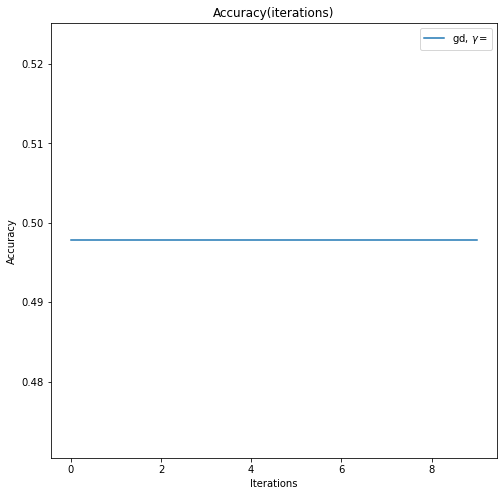

In [ ]:
x, y, labels = [], [], []
x.append([i for i in range(n_iter)])
y.append(acc_arr)
labels.append('gd, $\gamma = \frac{%f}{4L}$' % (args['c']))

title = 'Accuracy(iterations)'

opt.plot_graphs(x, y, x_label = "Iterations", lines_labels = labels, title = title, 
                logscale = False, criteria_type = "Accuracy")

In [ ]:
def Momentum_Grad_Descent(n_iter, X, lr, gamma, y, w_0, n):
    points = []
    w_old = w_0
    for i in range(n_iter):
        grad = Get_grad (X, y, w_old, n)
        if i < 2:
            w_new = w_old - lr*grad 
        else:
            w_new = w_old - lr*grad - gamma*(points[i] - points[i - 1])
        w_old = w_new 
        points.append(w_old)
    return points

def Momentum_Draw_Graph (n_iter, X, lr, gamma, y, w_0, n, w_true, criteria): 
    points = Momentum_Grad_Descent(n_iter, X, lr, gamma, y, w_0, n)
    diff_arr, crit_arr, x = [], [], []

    for i in range(n_iter):
        x.append(i + 1)
        diff_arr.append(points[i] - w_true)
        if criteria == "x_criteria":
            crit_arr.append(np.linalg.norm(diff_arr[i]))
        elif criteria == "f_criteria":
            crit_arr.append(np.abs(Logloss(X, y, points[i], n) - Logloss(X, y, w_true, n)))

    y = crit_arr
    if criteria == "x_criteria":
        plt.plot(x, y, label = "||w^k - w*||")
    elif criteria == "f_criteria":
        plt.plot(x, y, label = "|f(w^k) - f(w*)|")

    plt.xlabel('n_iter')
    plt.ylabel('criteria')
    plt.title('Standard axis convergence')
    plt.legend()
    plt.show()

__(б)__ Решите задачу логистической регрессии с помощью метода тяжелого шарика (не забудьте разделить выборку на две части: обучающую и тестовую). Зафиксируйте шаг $\frac{1}{L}$ и перебирайте разные значения моментума от -1 до 1. Постройте график сходимости метода от числа итераций (критерий сходимости подберите самостоятельно) для различных значений моментума. Всегда ли сходимость является монотонной?

In [ ]:
#ответ
w_true = Grad_Descent(10**4, X_train, 1/L, y_train, np.ones(d), np.shape((X_train)[0])[-1] )
for gamma in [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]:
    Momentum_Draw_Graph (100, X, 1/L, y, np.ones(d), np.shape(X_train)[0])[-1], n, gamma, w_true, "f_criteria") 

SyntaxError: unmatched ')' (<ipython-input-12-4f28686586d9>, line 4)

__(в)__ Для лучшего значения моментума постройте график зависимости точности модели на тестовой выборке от времени работы метода. Добавьте на этот же график сходимость градиентного спуска с шагом $\frac{1}{L}$. Сделайте вывод.

In [ ]:
#ответ

__(г)__ Если в пунктах (б) и (в) столкнулись с проблемами, попробуйте $\ell_2$-регуляризовать задачу или рассмотреть ее на ограниченном множестве.

In [ ]:
#ответ

__(д)__ Реализуйте ускоренный метод Нестерова (в форме Нестерова, а не который доказывали на семинаре). 

In [ ]:
#ответ

__(е)__ Решите задачу логистической регресии с помощью метода Нестерова (не забудьте разделить выборку на две части: обучающую и тестовую). Зафиксируйте шаг $\frac{1}{L}$ и перебирайте разные значения моментума от -1 до 1. Проверьте также значения моментума равные $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ - номер итерации), а если решаете сильно выпуклую задачу, то и $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$. Постройте график сходимости метода от числа итераций (критерий сходимости подберите самостоятельно) для различных значений моментума. Всегда ли сходимость является монотонной?

In [ ]:
#ответ

__(ж)__ Для лучшего значения моментума постройте график зависимости точности модели на тестовой выборке от времени работы метода. Добавьте этот график к графикам для тяжелого шарика и градиентного спуска из пункта (г). Сделайте итоговый вывод.

In [ ]:
#ответ

__Бонусные пункт__

__(з)__ Сделаем подбор константы $L$ адаптивным. Как упоминалось на семинаре, можно измерять локальную $L$, используя:
$$
f(y) \leq f(x^k) + \langle \nabla f(x^k), y - x^k \rangle + \frac{L}{2}\|x^k - y\|_2^2
$$
В частности, может подойти процедура:

```python
def backtracking_L(f, grad, x, h, L0, rho):
    L = L0
    fx = f(x)
    gradx = grad(x)
    while True:
        y = x - 1 / L * h
        if f(y) <= fx - 1 / L gradx.dot(h) + 1 / (2 * L) h.dot(h):
            break
        else:
            L = L * rho
    return L
```

Каким стоит взять __h__? __rho__ должно быть больше или меньше 1? __L0__ надо брать заведомо большим или маленьким?

In [ ]:
#ответ

__(и)__ Поэксперементируйте с этой процедурой, встроенной в подбор $L$ для шага градиентного спуска. В качестве задачи продолжайте рассматривать логистическую регрессию из Задачи 1. Аналогично встройте процедуру подбора $L$ в метод тяжелого шарика и ускоренный метод Нестерова. Постройте график сходимости метода от числа итераций (критерий сходимости подберите самостоятельно). Отобразите на этом графике градиентный спуск, тяжелый шарик и метод Нестерова с адаптивным шагом и шагом $\frac{1}{L}$ (всего 6 линий на графике). Сделайте вывод.

In [ ]:
#ответ

__(к)__ Постройте аналогичный пункту (и) график точности модели от времени.

In [ ]:
#ответ

__(л)__ В [работе](https://arxiv.org/pdf/1204.3982.pdf) представлена техника рестартов для подавления немонотонной сходимости Алгоритма 2 (метод Нестерова). Попробуйте повторить эксперименты авторов на $\ell_2$-регуляризованной квадратичной или логистической регресии. Возьмите параметр регуляризации $\lambda = L / 100$.

In [ ]:
#ответ